<a href="https://colab.research.google.com/github/Anika2020/Vehicle-Insurance-Project/blob/main/Final_Sprint_1_doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the libraries and datasets**

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np


# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
# Install python library for partial dependence plot toolbox
!pip install pdpbox 
# Install python library for SHAP explainer toolbox
!pip install shap


!pip install lime

In [ ]:
#Loading datasets
test = pd.read_csv('/content/test.csv')
insur_dataset = pd.read_csv('/content/train.csv')

# **Data pre-processing and exploration**

In [ ]:
print(insur_dataset.keys())

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')


In [ ]:
insur_dataset.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                3200 non-null   object
 1   Age               3200 non-null   int64 
 2   Job               3186 non-null   object
 3   Marital           3200 non-null   object
 4   Education         3061 non-null   object
 5   Default           3200 non-null   int64 
 6   Balance           3200 non-null   int64 
 7   HHInsurance       3200 non-null   int64 
 8   CarLoan           3200 non-null   int64 
 9   Communication     2487 non-null   object
 10  LastContactDay    3200 non-null   int64 
 11  LastContactMonth  3200 non-null   object
 12  NoOfContacts      3200 non-null   int64 
 13  DaysPassed        3200 non-null   int64 
 14  PrevAttempts      3200 non-null   int64 
 15  Outcome           754 non-null    object
 16  CallStart         3200 non-null   object
 17  CallEnd       

In [ ]:
insur_dataset.head(10)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,CI1,48,blue-collar,married,secondary,0,1,0,0,NaN,5,may,3,-1,0,NaN,15:10:12,15:21:21,0
1,CI2,32,blue-collar,married,primary,0,0,1,0,cellular,11,may,3,-1,0,NaN,15:46:58,15:49:08,0
2,CI3,56,technician,married,secondary,0,2558,0,0,NaN,19,jun,1,-1,0,NaN,10:42:27,10:47:15,0
3,CI4,46,management,married,tertiary,0,0,0,0,cellular,3,mar,13,-1,0,NaN,9:33:25,9:38:30,1
4,CI5,37,blue-collar,married,secondary,0,489,1,0,NaN,2,jun,1,-1,0,NaN,12:55:03,12:55:27,0
5,CI6,28,admin.,single,secondary,0,2,1,0,cellular,24,jul,1,-1,0,NaN,12:18:30,12:26:04,1
6,CI7,50,technician,divorced,tertiary,0,1679,1,0,cellular,24,jul,2,-1,0,NaN,12:50:19,13:00:23,0
7,CI8,36,self-employed,single,secondary,0,74,1,1,cellular,12,may,2,-1,0,NaN,9:49:13,9:52:31,0
8,CI9,45,blue-collar,married,primary,0,1291,1,0,cellular,28,aug,17,-1,0,NaN,9:52:21,9:55:30,0
9,CI10,36,technician,single,secondary,0,12264,0,0,cellular,12,apr,2,-1,0,NaN,9:01:53,9:04:31,1


In [ ]:
 print('Train Shape (rows, columns):', insur_dataset.shape)

Train Shape (rows, columns): (3200, 19)


In [ ]:
# Check for missing values
insur_dataset.isnull().sum()

Id                     0
Age                    0
Job                   14
Marital                0
Education            139
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        713
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             2446
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [ ]:
# Descriptive Statistics
insur_dataset.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,3200.000000,3200.000000,3200.00000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,41.297812,0.013437,1536.73375,0.492500,0.131562,15.745938,2.636250,47.947812,0.706875,0.402500
std,11.583601,0.115157,3615.13688,0.500022,0.338067,8.403888,3.189375,105.929616,1.916762,0.490478
min,18.000000,0.000000,-3058.00000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,112.50000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,565.50000,0.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1626.25000,1.000000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,92.000000,1.000000,98417.00000,1.000000,1.000000,31.000000,43.000000,842.000000,30.000000,1.000000


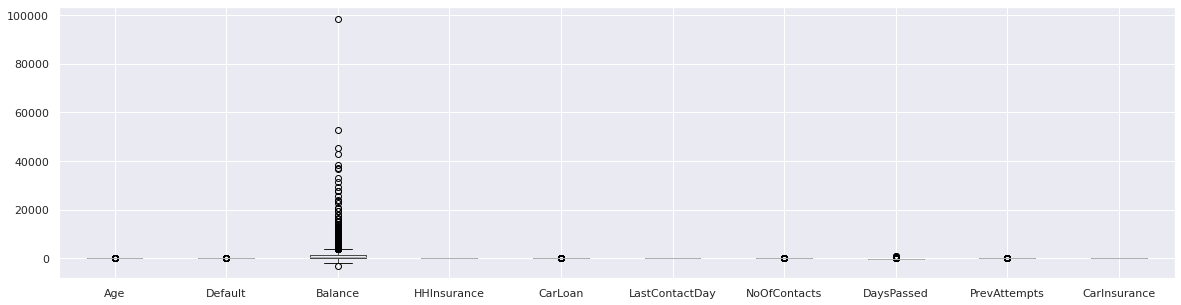

In [ ]:
#Box Plot analysis
insur_dataset.boxplot(figsize=(20,5))   # Balance has outliers

In [ ]:
# Let's write a function to create a column chart with respect to car insurance feature. 
# i.e. survival based on a given feature type. (i.e. survival based on gender)
def bar_chart(dataframe, feature):
    customers = dataframe[dataframe['CarInsurance']==1][feature].value_counts()
    prospects = dataframe[dataframe['CarInsurance']==0][feature].value_counts()
    insur_dataset = pd.DataFrame([customers, prospects])
    insur_dataset.index = ['subscribed','not subscribed']
    insur_dataset.plot(kind='bar',stacked=True, figsize=(10,5), )

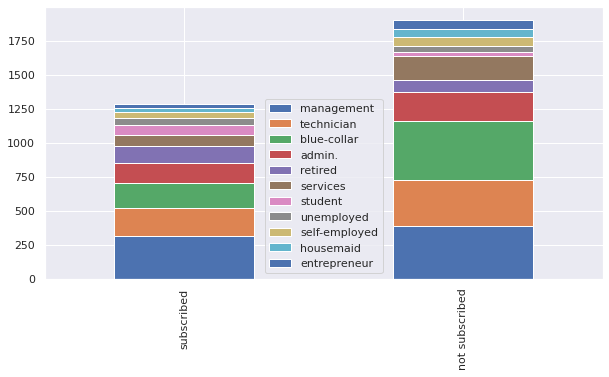

In [ ]:
bar_chart(insur_dataset,'Job')

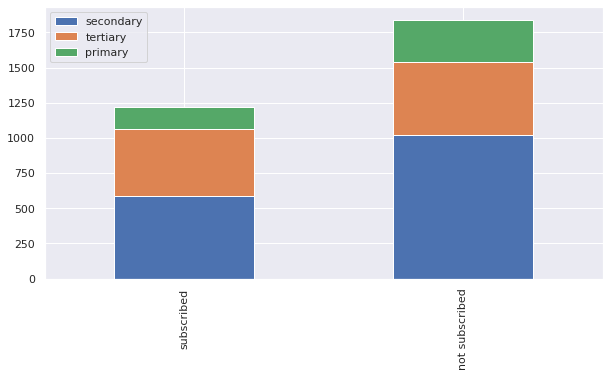

In [ ]:
bar_chart(insur_dataset,'Education')

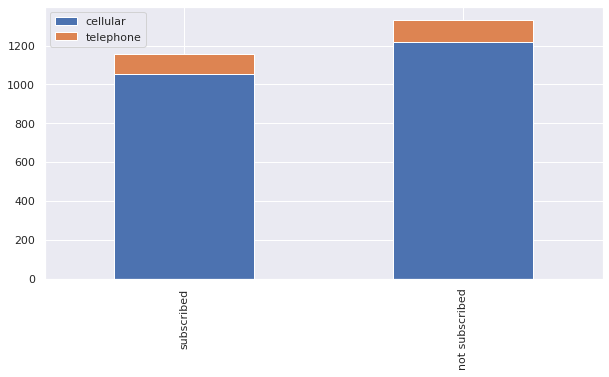

In [ ]:
bar_chart(insur_dataset,'Communication')

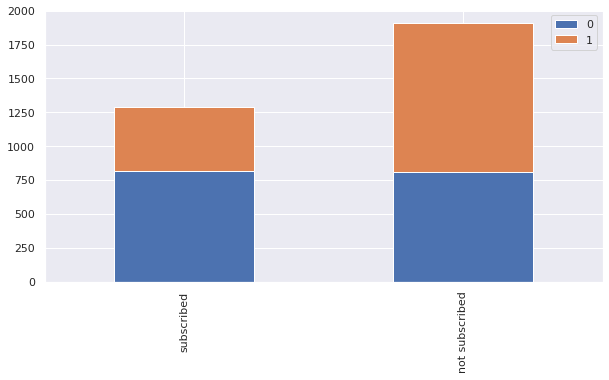

In [ ]:
bar_chart(insur_dataset,'HHInsurance')

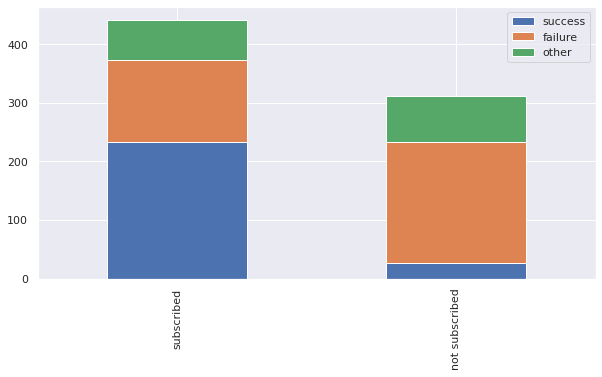

In [ ]:
bar_chart(insur_dataset,'Outcome')

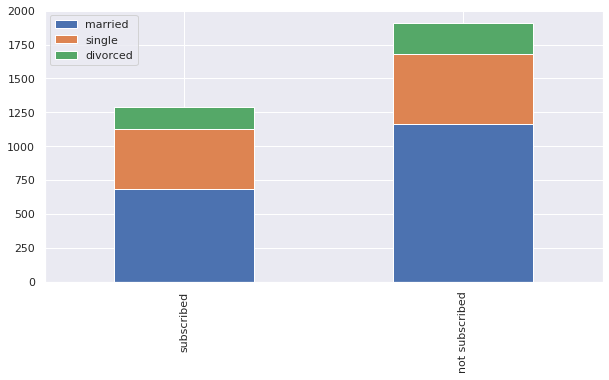

In [ ]:
bar_chart(insur_dataset,'Marital')

# **Wrangling and Feature Engineering**

In [ ]:
#Need to perform missing value imputation before creating dummy variables

insur_dataset.head(20)
insur_dataset['Job'].fillna('Not known', inplace=True)
insur_dataset['Education'].fillna('Not known', inplace=True)
insur_dataset['Communication'].fillna('Not known', inplace=True)
insur_dataset['Outcome'].fillna('New customers', inplace=True)

# Missing value imputation for test dataset
#test.head(20)
#test['Job'].fillna('Not known', inplace=True)
#test['Education'].fillna('Not known', inplace=True)
#test['Communication'].fillna('Not known', inplace=True)
#test['Outcome'].fillna('New customers', inplace=True)

#test.isnull().sum()

In [ ]:
test_copy = test.copy()

#type(test)


In [ ]:
#Creating dummy variables and mapping them with the main df

#'Id', 'Job','Marital', 'Education', 'Communication', 'Outcome'


df_dummy = insur_dataset.copy() 
#In Python you can't just assign the names (as it creates a reference of the original datset) and create copies..it will still modify your orignial datset

from sklearn.preprocessing import LabelEncoder


number = LabelEncoder()
df_dummy['Job'] = number.fit_transform(df_dummy['Job'].astype('str'))
df_dummy['Marital'] = number.fit_transform(df_dummy['Marital'].astype('str'))
df_dummy['Education'] = number.fit_transform(df_dummy['Education'].astype('str'))
df_dummy['Communication'] = number.fit_transform(df_dummy['Communication'].astype('str'))
df_dummy['LastContactMonth'] = number.fit_transform(df_dummy['LastContactMonth'].astype('str'))
df_dummy['Outcome'] = number.fit_transform(df_dummy['Outcome'].astype('str'))

#df_dummy['Id'] = number.fit_transform(df_dummy['Id'].astype('str'))

df_dummy

# dummy variables for test dataset
#test_dummy = test.copy()  # Creating a copy
test_copy['Job']=test_copy['Job'].fillna('Not known', inplace=True)
test_copy['Education'] = test_copy['Education'].fillna('Not known', inplace=True)
test_copy['Communication']=test_copy['Communication'].fillna('Not known', inplace=True)
test_copy['Outcome']=test_copy['Outcome'].fillna('New customers', inplace=True)
test_copy['LastContactMonth'] = number.fit_transform(test_copy['LastContactMonth'].astype('str'))
test_copy['Outcome'] = number.fit_transform(test['Outcome'].astype('str'))
test_copy['Marital'] = number.fit_transform(test_copy['Marital'].astype('str'))
test_copy['Education'] = number.fit_transform(test_copy['Education'].astype('str'))
test_copy['Communication'] = number.fit_transform(test_copy['Communication'].astype('str'))
#number = LabelEncoder()
#test_dummy['Job'] = number.fit_transform(test_dummy['Job'].astype('str'))
#test_dummy['Marital'] = number.fit_transform(test_dummy['Marital'].astype('str'))
#test_dummy['Education'] = number.fit_transform(test_dummy['Education'].astype('str'))
#test_dummy['Communication'] = number.fit_transform(test_dummy['Communication'].astype('str'))
#test_dummy['Outcome'] = number.fit_transform(test_dummy['Outcome'].astype('str'))

#test_dummy['Id'] = number.fit_transform(test_dummy['Id'].astype('str'))


#df_dummy.head(25)

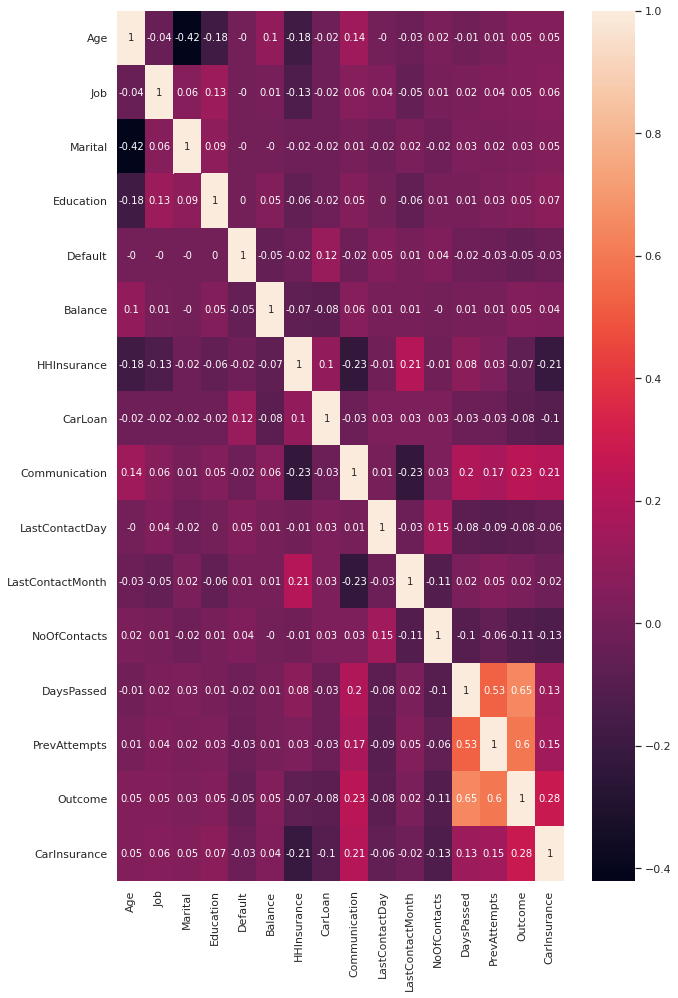

In [ ]:
correlation_matrix = df_dummy.corr().round(2)
plt.figure(figsize=(10, 16)) # Added to make the heatmap larger because of unreadability
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [ ]:
df_dummy.info()
df_dummy.isnull().sum() #Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                3200 non-null   object
 1   Age               3200 non-null   int64 
 2   Job               3200 non-null   int64 
 3   Marital           3200 non-null   int64 
 4   Education         3200 non-null   int64 
 5   Default           3200 non-null   int64 
 6   Balance           3200 non-null   int64 
 7   HHInsurance       3200 non-null   int64 
 8   CarLoan           3200 non-null   int64 
 9   Communication     3200 non-null   int64 
 10  LastContactDay    3200 non-null   int64 
 11  LastContactMonth  3200 non-null   int64 
 12  NoOfContacts      3200 non-null   int64 
 13  DaysPassed        3200 non-null   int64 
 14  PrevAttempts      3200 non-null   int64 
 15  Outcome           3200 non-null   int64 
 16  CallStart         3200 non-null   object
 17  CallEnd       

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [ ]:
df_dummy.describe()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.00000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,41.297812,5.380625,1.174375,2.082813,0.013437,1536.73375,0.492500,0.131562,0.845625,15.745938,5.458750,2.636250,47.947812,0.706875,0.444375,0.402500
std,11.583601,3.223003,0.626271,0.787336,0.115157,3615.13688,0.500022,0.338067,0.517206,8.403888,3.139587,3.189375,105.929616,1.916762,0.909486,0.490478
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3058.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,1.000000,2.000000,0.000000,112.50000,0.000000,0.000000,1.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,5.000000,1.000000,2.000000,0.000000,565.50000,0.000000,0.000000,1.000000,16.000000,6.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,49.000000,8.000000,2.000000,3.000000,0.000000,1626.25000,1.000000,0.000000,1.000000,22.000000,8.000000,3.000000,-1.000000,0.000000,0.000000,1.000000
max,92.000000,11.000000,2.000000,3.000000,1.000000,98417.00000,1.000000,1.000000,2.000000,31.000000,11.000000,43.000000,842.000000,30.000000,3.000000,1.000000


days passed and previous attempts are highly correlated (independent variables)




In [ ]:
# Binning Age 
df_dummy.loc[((df_dummy['Age']>= 18) & (df_dummy['Age']< 26)), 'Age'] = 0
df_dummy.loc[((df_dummy['Age'] >= 26) & (df_dummy['Age'] < 34)), 'Age'] = 1
df_dummy.loc[((df_dummy['Age'] >= 34) & (df_dummy['Age'] < 42)), 'Age'] = 2
df_dummy.loc[((df_dummy['Age'] >= 42) & (df_dummy['Age'] < 50)), 'Age'] = 3
df_dummy.loc[((df_dummy['Age'] >= 50) & (df_dummy['Age'] < 58)), 'Age'] = 4
df_dummy.loc[((df_dummy['Age'] >= 58) & (df_dummy['Age'] < 66)), 'Age'] = 5
df_dummy.loc[((df_dummy['Age'] >= 66) & (df_dummy['Age'] < 74)), 'Age'] = 6
df_dummy.loc[((df_dummy['Age'] >= 74) & (df_dummy['Age'] < 82)), 'Age'] = 7
df_dummy.loc[((df_dummy['Age'] >= 82) & (df_dummy['Age'] < 90)), 'Age'] = 8
df_dummy.loc[((df_dummy['Age'] >= 90) & (df_dummy['Age'] < 98)), 'Age'] = 9

df_dummy['Age']


0       3
1       1
2       4
3       3
4       2
       ..
3195    4
3196    3
3197    2
3198    1
3199    1
Name: Age, Length: 3200, dtype: int64

In [ ]:
# Binning Age for test dataset

##test_dummy.loc[(test_dummy['Age'] >= 18) & (test_dummy['Age'] < 26), 'Age'] = 0,
#test_dummy.loc[(test_dummy['Age'] >= 26) & (test_dummy['Age'] < 34), 'Age'] = 1,
#test_dummy.loc[(test_dummy['Age'] >= 34) & (test_dummy['Age'] < 42), 'Age'] = 2,
#test_dummy.loc[(test_dummy['Age'] >= 42) & (test_dummy['Age'] < 50), 'Age'] = 3,
#test_dummy.loc[(test_dummy['Age'] >= 50) & (test_dummy['Age'] < 58), 'Age'] = 4,
#test_dummy.loc[(test_dummy['Age'] >= 58) & (test_dummy['Age'] < 66), 'Age'] = 5,
#test_dummy.loc[(test_dummy['Age'] >= 66) & (test_dummy['Age'] < 74), 'Age'] = 6,
#test_dummy.loc[(test_dummy['Age'] >= 74) & (test_dummy['Age'] < 82), 'Age'] = 7,
#test_dummy.loc[(test_dummy['Age'] >= 82) & (test_dummy['Age'] < 88), 'Age'] = 8,
#test_dummy.loc[(test_dummy['Age'] >= 88) & (test_dummy['Age'] < 96), 'Age'] = 9


##Removing Variables

In [ ]:
#Removing variables according to business case understanding

df_final = df_dummy.drop(['CallStart', 'CallEnd','Balance','Marital', 'Id', 'Age','LastContactMonth','Job','Default','LastContactDay','Education'], axis=1)#,'LastContactDay','Education'"""
test_copy = test_copy.drop(['CallStart', 'CallEnd','Balance', 'Marital', 'Id','Age','LastContactMonth','Job','Default','LastContactDay','Education'], axis=1)#,'LastContactDay','Education'"""


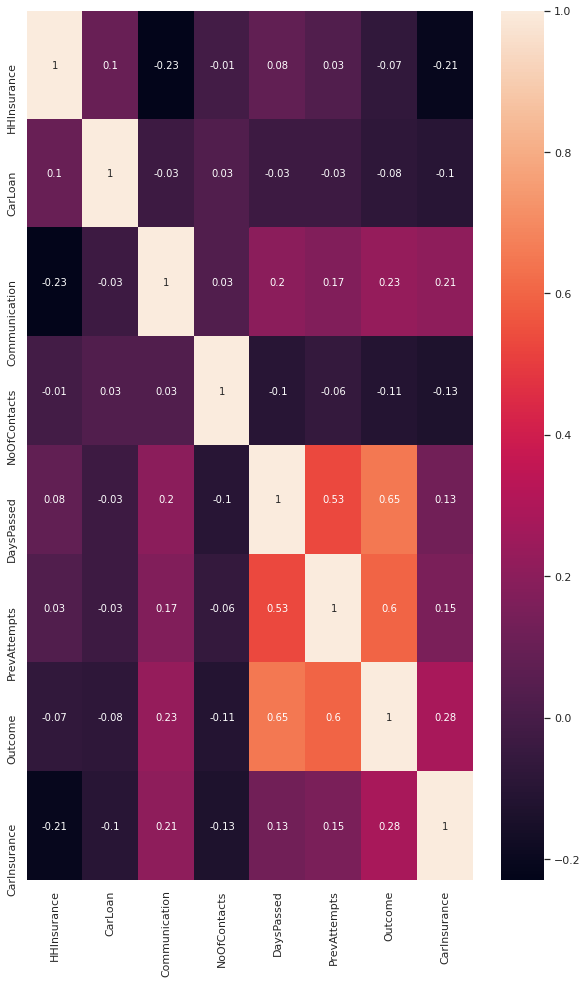

In [ ]:

correlation_matrix = df_final.corr().round(2)
plt.figure(figsize=(10, 16)) # Added to make the heatmap larger because of unreadability
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHInsurance    3200 non-null   int64
 1   CarLoan        3200 non-null   int64
 2   Communication  3200 non-null   int64
 3   NoOfContacts   3200 non-null   int64
 4   DaysPassed     3200 non-null   int64
 5   PrevAttempts   3200 non-null   int64
 6   Outcome        3200 non-null   int64
 7   CarInsurance   3200 non-null   int64
dtypes: int64(8)
memory usage: 200.1 KB


In [ ]:
df_final.keys()

Index(['HHInsurance', 'CarLoan', 'Communication', 'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'Outcome', 'CarInsurance'],
      dtype='object')

# **Splitting the dataset**

In [ ]:
from sklearn.model_selection  import train_test_split
X_train = df_final.drop(columns=['CarInsurance'], axis=1)
Y_train = df_final['CarInsurance']


X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.125)

print('Train Shape (rows, columns):', X_train.shape)
print('Validation Shape (rows, columns):', X_validation.shape)

Train Shape (rows, columns): (2800, 7)
Validation Shape (rows, columns): (400, 7)


In [ ]:
X_train.info()
X_train.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 1951 to 2675
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHInsurance    2800 non-null   int64
 1   CarLoan        2800 non-null   int64
 2   Communication  2800 non-null   int64
 3   NoOfContacts   2800 non-null   int64
 4   DaysPassed     2800 non-null   int64
 5   PrevAttempts   2800 non-null   int64
 6   Outcome        2800 non-null   int64
dtypes: int64(7)
memory usage: 175.0 KB


False


# **Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHInsurance    3200 non-null   int64
 1   CarLoan        3200 non-null   int64
 2   Communication  3200 non-null   int64
 3   NoOfContacts   3200 non-null   int64
 4   DaysPassed     3200 non-null   int64
 5   PrevAttempts   3200 non-null   int64
 6   Outcome        3200 non-null   int64
 7   CarInsurance   3200 non-null   int64
dtypes: int64(8)
memory usage: 200.1 KB


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
# Training accuracy
Y_train_predict_dtree = clf.predict(X_train)
#Validation accuracy
Y_predict_dtree = clf.predict(X_validation)


## Model Evaluation 

In [ ]:
# Evaluate Accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(Y_train_predict_dtree, Y_train)
print('Training Accuracy: {:.2f}%'.format(accuracy_train*100))
accuracy_val = accuracy_score(Y_predict_dtree,Y_validation)
print('Validation Accuracy: {:.2f}%'.format(accuracy_val*100))

Training Accuracy: 76.86%
Validation Accuracy: 65.00%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_validation, Y_predict_dtree, labels=[0, 1])

array([[188,  33],
       [107,  72]])

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict_dtree, Y_train)
print('Training report\n', report)

report = classification_report(Y_predict_dtree, Y_validation)
print('Validation report\n', report)


Training report
               precision    recall  f1-score   support

           0       0.92      0.75      0.83      2061
           1       0.54      0.81      0.65       739

    accuracy                           0.77      2800
   macro avg       0.73      0.78      0.74      2800
weighted avg       0.82      0.77      0.78      2800

Validation report
               precision    recall  f1-score   support

           0       0.85      0.64      0.73       295
           1       0.40      0.69      0.51       105

    accuracy                           0.65       400
   macro avg       0.63      0.66      0.62       400
weighted avg       0.73      0.65      0.67       400



Visualize the decision tree

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [ ]:
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 1951 to 2675
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHInsurance    2800 non-null   int64
 1   CarLoan        2800 non-null   int64
 2   Communication  2800 non-null   int64
 3   NoOfContacts   2800 non-null   int64
 4   DaysPassed     2800 non-null   int64
 5   PrevAttempts   2800 non-null   int64
 6   Outcome        2800 non-null   int64
dtypes: int64(7)
memory usage: 175.0 KB


#AUC- Decision Tree

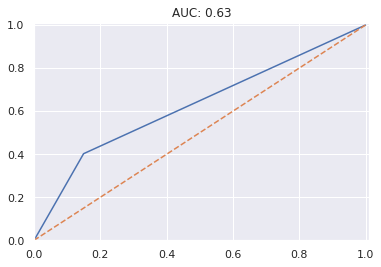

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_predict_dtree)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_predict_dtree, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Defining the algorithm
reg = LogisticRegression(max_iter = 6000)
# Train the model
reg.fit(X_train,Y_train)
# Training accuracy
Y_train_predict = reg.predict(X_train)
#Validation accuracy
Y_val_predict = reg.predict(X_validation)

In [ ]:
reg.intercept_

array([-0.44837158])

In [ ]:
reg.coef_

array([[-0.69265736, -0.40299535,  0.54845844, -0.12329959, -0.0015629 ,
        -0.00298766,  0.70336551]])

In [ ]:
'''from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) 
rr.fit(X_train, Y_train)
# Training accuracy
rr_train_predict = rr.predict(X_train)
#Validation accuracy
rr_val_predict = rr.predict(X_validation)'''

'from sklearn.linear_model import Ridge\nrr = Ridge(alpha=0.01) \nrr.fit(X_train, Y_train)\n# Training accuracy\nrr_train_predict = rr.predict(X_train)\n#Validation accuracy\nrr_val_predict = rr.predict(X_validation)'

In [ ]:
'''Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_validation, Y_validation)
print(Ridge_train_score)
print(Ridge_test_score)'''

'Ridge_train_score = rr.score(X_train,Y_train)\nRidge_test_score = rr.score(X_validation, Y_validation)\nprint(Ridge_train_score)\nprint(Ridge_test_score)'

##Model Evaluation

In [ ]:
# Classification accuracy
from sklearn.metrics import accuracy_score

# Error calculation 
error_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.6710714285714285
Validation Classif Accuracy: 0.65


In [ ]:
 reg.predict_proba(X_train)

array([[0.67135219, 0.32864781],
       [0.79996334, 0.20003666],
       [0.75348802, 0.24651198],
       ...,
       [0.65433465, 0.34566535],
       [0.40408471, 0.59591529],
       [0.63365863, 0.36634137]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

In [ ]:
 confusion_matrix(Y_validation, Y_val_predict,labels=[0, 1])

array([[201,  20],
       [120,  59]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)


Training report
               precision    recall  f1-score   support

           0       0.91      0.67      0.77      2310
           1       0.31      0.69      0.42       490

    accuracy                           0.67      2800
   macro avg       0.61      0.68      0.60      2800
weighted avg       0.80      0.67      0.71      2800

Validation report
               precision    recall  f1-score   support

           0       0.91      0.63      0.74       321
           1       0.33      0.75      0.46        79

    accuracy                           0.65       400
   macro avg       0.62      0.69      0.60       400
weighted avg       0.79      0.65      0.69       400



#AUC-Logistic regression

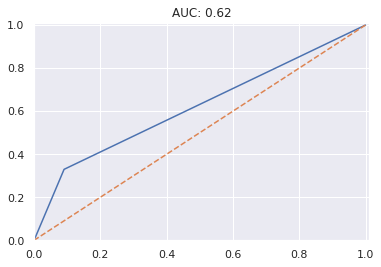

In [ ]:
#AUC and ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
#K-fold cross validation
from sklearn import model_selection
a = df_final.drop('CarInsurance', axis=1)
b = df_final['CarInsurance']
X = a.values
Y = b.values
k = 10 # use 10-Fold cross validation with logistic regression
kfold = model_selection.KFold(n_splits=k, random_state=2)
model = LogisticRegression(max_iter=4000)
# Classification accuracy
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print("Accuracy: {:.2f} ({:.2f})".format(results.mean(), results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.67 (0.02)


#K- nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 52)
# Train the model
neigh.fit(X_train,Y_train)
# Training accuracy
Y_train_predict_neigh = neigh.predict(X_train)
#Validation accuracy
Y_val_predict_neigh = neigh.predict(X_validation)

In [ ]:
 confusion_matrix(Y_validation, Y_val_predict_neigh,labels=[0, 1])

array([[182,  39],
       [ 99,  80]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(Y_train_predict_neigh, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict_neigh, Y_validation)
print('Validation report\n', report)


Training report
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      1988
           1       0.48      0.65      0.55       812

    accuracy                           0.69      2800
   macro avg       0.66      0.68      0.66      2800
weighted avg       0.73      0.69      0.70      2800

Validation report
               precision    recall  f1-score   support

           0       0.82      0.65      0.73       281
           1       0.45      0.67      0.54       119

    accuracy                           0.66       400
   macro avg       0.64      0.66      0.63       400
weighted avg       0.71      0.66      0.67       400



#AUC- KNN

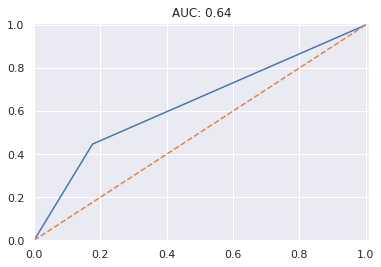

In [ ]:
#AUC and ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict_neigh)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict_neigh, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

#Neural Network Classification

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(25), max_iter=5000)

In [ ]:
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=25, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
Y_predict = mlp.predict(X_validation)
X_predict = mlp.predict(X_train)

### Accuracy Evaluation

In [ ]:
# Evaluate Accuracy
accuracy = accuracy_score(Y_validation, Y_predict)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 65.50%


In [ ]:
#Evaluate Training Accuracy
taccuracy = accuracy_score(Y_train, X_predict)
print('Training Accuracy: {:.2f}%'.format(accuracy*100))

Training Accuracy: 65.50%


In [ ]:
confusion_matrix(Y_validation, Y_predict, labels=[0, 1])

array([[199,  22],
       [116,  63]])

In [ ]:
# Evaluate precision and recall
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f_score, support = precision_recall_fscore_support(Y_train, X_predict, labels=[0, 1])
print('precision: {}(0), {}(1)'.format(precision[0], precision[1]))
print('recall: {}(0), {}(1)'.format(recall[0], recall[1]))
print('f_score: {}(0), {}(1)'.format(f_score[0], f_score[1]))
print('support: {}(0), {}(1)'.format(support[0], support[1]))

precision, recall, f_score, support = precision_recall_fscore_support(Y_validation, Y_predict, labels=[0, 1])
print('precision: {}(0), {}(1)'.format(precision[0], precision[1]))
print('recall: {}(0), {}(1)'.format(recall[0], recall[1]))
print('f_score: {}(0), {}(1)'.format(f_score[0], f_score[1]))
print('support: {}(0), {}(1)'.format(support[0], support[1]))

precision: 0.6932234432234432(0), 0.7126623376623377(1)
recall: 0.8953282081608516(0), 0.3958521190261497(1)
f_score: 0.7814193548387096(0), 0.5089855072463767(1)
support: 1691(0), 1109(1)
precision: 0.6317460317460317(0), 0.7411764705882353(1)
recall: 0.9004524886877828(0), 0.35195530726256985(1)
f_score: 0.7425373134328358(0), 0.4772727272727273(1)
support: 221(0), 179(1)


#AUC-Neural Network

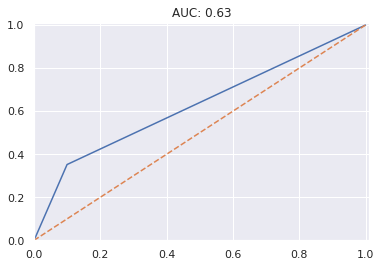

In [ ]:
auc = roc_auc_score(Y_validation, Y_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

#Ensemble Approaches

#Adaboost

In [ ]:
#Adaboost Classifier
!pip install sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [500, 1000]
             }

model = AdaBoostClassifier(random_state=1, learning_rate=1.1)
grid_search_ABC = GridSearchCV(model, param_grid=param_grid, scoring = 'roc_auc')
model.fit(X_train, Y_train)

# Training accuracy
ada_train_predict = model.predict(X_train)
#Validation accuracy
ada_val_predict = model.predict(X_validation)


In [ ]:
model.score(X_train,Y_train)

0.7114285714285714

In [ ]:
model.score(X_validation,Y_validation)

0.6575

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(ada_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(ada_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.87      0.72      0.78      2043
           1       0.48      0.70      0.57       757

    accuracy                           0.71      2800
   macro avg       0.67      0.71      0.68      2800
weighted avg       0.76      0.71      0.73      2800

Validation report
               precision    recall  f1-score   support

           0       0.86      0.64      0.73       294
           1       0.41      0.70      0.52       106

    accuracy                           0.66       400
   macro avg       0.63      0.67      0.63       400
weighted avg       0.74      0.66      0.68       400



In [ ]:
confusion_matrix(Y_validation, Y_predict, labels=[0, 1])

array([[199,  22],
       [116,  63]])

#AUC-Adaboost

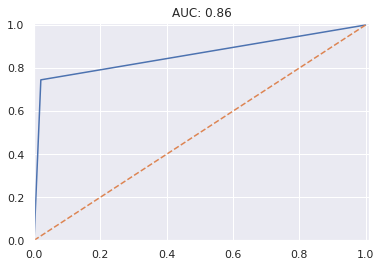

In [ ]:
auc = roc_auc_score(ada_val_predict, Y_predict)
fpr, tpr, thresholds = roc_curve(ada_val_predict, Y_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

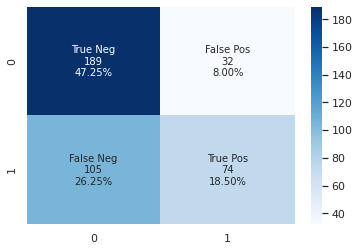

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_validation, ada_val_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


#Deploying the Adaboost model on test dataset

In [ ]:
"""#model = AdaBoostClassifier(random_state=1)
#model.fit(X_train, Y_train)
# making prediction
ynew = model.predict(test_copy)
ynew = pd.DataFrame(ynew)"""

'#model = AdaBoostClassifier(random_state=1)\n#model.fit(X_train, Y_train)\n# making prediction\nynew = model.predict(test_copy)\nynew = pd.DataFrame(ynew)'

In [ ]:
"""test_copy['CarInsurance'] = ynew
test_copy.head()

#final_sub =[test, test_copy]
#final_file=pd.concat(final_sub, join='inner', inde axis=1)
final_file = pd.merge(test, test_copy, left_index=True, right_index=True)
submission= final_file[['Id','CarInsurance']]

submission.to_csv("Field_Miners_Sprint_ada1.csv", index = False)
#df_submission.dtypes
submission.head(20)"""


'test_copy[\'CarInsurance\'] = ynew\ntest_copy.head()\n\n#final_sub =[test, test_copy]\n#final_file=pd.concat(final_sub, join=\'inner\', inde axis=1)\nfinal_file = pd.merge(test, test_copy, left_index=True, right_index=True)\nsubmission= final_file[[\'Id\',\'CarInsurance\']]\n\nsubmission.to_csv("Field_Miners_Sprint_ada1.csv", index = False)\n#df_submission.dtypes\nsubmission.head(20)'

In [ ]:
model.score(X_validation,Y_validation)

0.6575

#Gradient boost

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model1= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model1.fit(X_train, Y_train)

# Training accuracy
gra_train_predict = model1.predict(X_train)
#Validation accuracy
gra_val_predict = model1.predict(X_validation)

confusion_matrix(Y_validation, Y_predict, labels=[0, 1])

array([[199,  22],
       [116,  63]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(gra_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(gra_val_predict, Y_validation)
print('Validation report\n', report)
print(model.score(X_validation,Y_validation))

Training report
               precision    recall  f1-score   support

           0       0.99      0.65      0.78      2564
           1       0.19      0.91      0.32       236

    accuracy                           0.67      2800
   macro avg       0.59      0.78      0.55      2800
weighted avg       0.92      0.67      0.75      2800

Validation report
               precision    recall  f1-score   support

           0       0.99      0.60      0.74       367
           1       0.17      0.94      0.29        33

    accuracy                           0.62       400
   macro avg       0.58      0.77      0.52       400
weighted avg       0.92      0.63      0.71       400

0.6575


#AUC-Gradient Boost

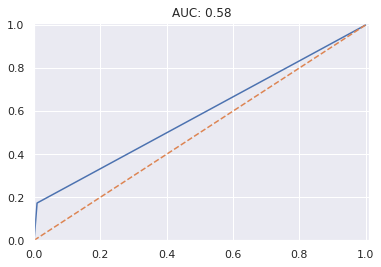

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, gra_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, gra_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

#XGBoost

In [ ]:
from xgboost import XGBClassifier
model_2 = XGBClassifier(colsample_bylevel=0.5, max_depth=10, n_estimators=2000, gamma = 3)

model_2.fit(X_train, Y_train)

# Training accuracy
xgb_train_predict = model_2.predict(X_train)
#Validation accuracy
xgb_val_predict = model_2.predict(X_validation)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(xgb_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(xgb_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      2097
           1       0.48      0.76      0.59       703

    accuracy                           0.74      2800
   macro avg       0.69      0.74      0.70      2800
weighted avg       0.80      0.74      0.75      2800

Validation report
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       302
           1       0.40      0.73      0.52        98

    accuracy                           0.67       400
   macro avg       0.64      0.69      0.63       400
weighted avg       0.76      0.67      0.69       400



In [ ]:
cf_matrix = confusion_matrix(Y_validation, xgb_val_predict)
print(cf_matrix)

[[195  26]
 [107  72]]


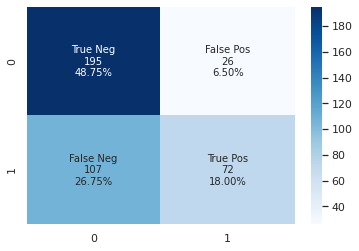

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_validation, xgb_val_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [ ]:
model_2.score(X_validation,Y_validation)

0.6675

#AUC-XG Boost

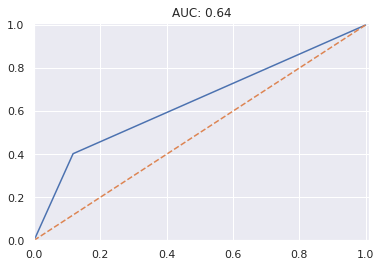

In [ ]:
auc = roc_auc_score(Y_validation, xgb_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, xgb_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

#Deploying the XGboost model on test dataset

In [ ]:
#model_2 = XGBClassifier(colsample_bylevel=0.5, max_depth=10, n_estimators=100)
#model_2.fit(X_train, Y_train)
# making prediction
ynew = model_2.predict(test_copy)
ynew = pd.DataFrame(ynew)

In [ ]:
df_dummy.to_csv("keys.csv", index=False)

In [ ]:
test_copy['CarInsurance'] = ynew
test_copy.head()

#final_sub =[test, test_copy]
#final_file=pd.concat(final_sub, join='inner', inde axis=1)
final_file = pd.merge(test, test_copy, left_index=True, right_index=True)
submission = final_file
submission.to_csv("Field_Miners_Sprint_final_file.csv", index =False)
submission2= final_file[['Id','CarInsurance']]

submission2.to_csv("Field_Miners_Sprint_new_2.csv", index =False)
#df_submission.dtypes

final_file.head(20)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance_x,CarLoan_x,Communication_x,LastContactDay,LastContactMonth,NoOfContacts_x,DaysPassed_x,PrevAttempts_x,Outcome_x,CallStart,CallEnd,HHInsurance_y,CarLoan_y,Communication_y,NoOfContacts_y,DaysPassed_y,PrevAttempts_y,Outcome_y,CarInsurance
0,CP1,56,entrepreneur,married,tertiary,0,693,0,0,cellular,22,jul,5,-1,0,NaN,15:10:43,15:12:12,0,0,0,5,-1,0,1,0
1,CP2,39,management,married,tertiary,0,20932,0,0,cellular,21,nov,2,-1,0,NaN,16:54:47,16:56:54,0,0,0,2,-1,0,1,0
2,CP3,24,management,single,tertiary,0,393,0,0,cellular,27,sep,1,-1,0,NaN,15:40:46,16:02:24,0,0,0,1,-1,0,1,0
3,CP4,39,blue-collar,divorced,secondary,0,42,1,0,NaN,6,may,2,-1,0,NaN,16:52:33,16:56:19,1,0,0,2,-1,0,1,0
4,CP5,31,services,married,secondary,0,413,1,0,NaN,13,may,1,-1,0,NaN,12:28:32,12:29:37,1,0,0,1,-1,0,1,0
5,CP6,23,housemaid,married,tertiary,0,66,1,0,cellular,7,may,2,-1,0,NaN,9:25:35,9:48:46,1,0,0,2,-1,0,1,0
6,CP7,35,admin.,married,secondary,0,1286,1,0,cellular,5,may,3,337,1,other,15:05:16,15:19:38,1,0,0,3,337,1,2,0
7,CP8,55,technician,divorced,tertiary,0,0,0,0,cellular,17,nov,2,91,1,success,9:38:42,9:40:56,0,0,0,2,91,1,3,1
8,CP9,45,management,married,tertiary,0,1447,1,1,cellular,7,jul,2,-1,0,NaN,17:49:12,17:56:53,1,1,0,2,-1,0,1,0
9,CP10,57,services,married,secondary,0,197,0,0,NaN,16,jun,1,-1,0,NaN,15:39:13,15:41:09,0,0,0,1,-1,0,1,0


In [ ]:
model.score(X_validation,Y_validation)

0.6575

# **Model Explanation**

In [ ]:
from pdpbox import pdp
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


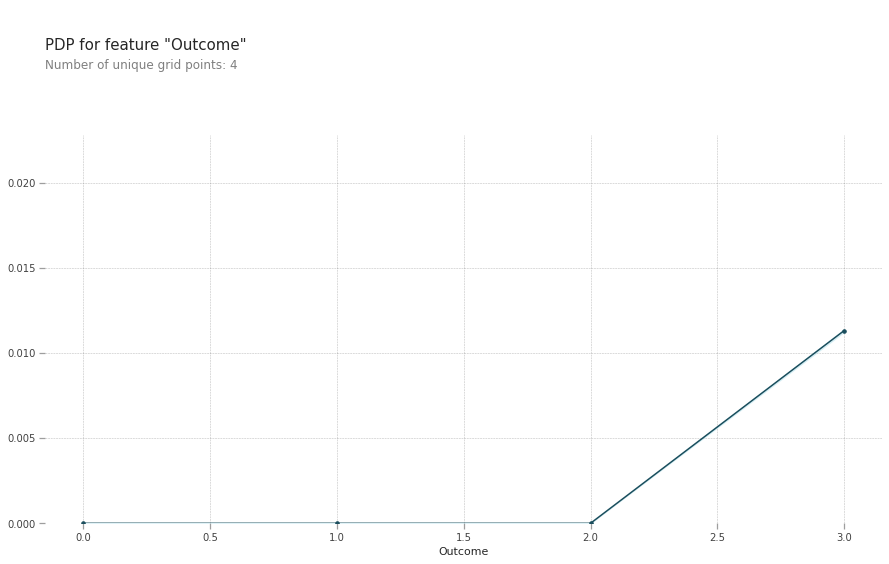

In [ ]:
# plot the PD univariate plot with Adaboost
plot_pdp(model, X_train, 'Outcome')

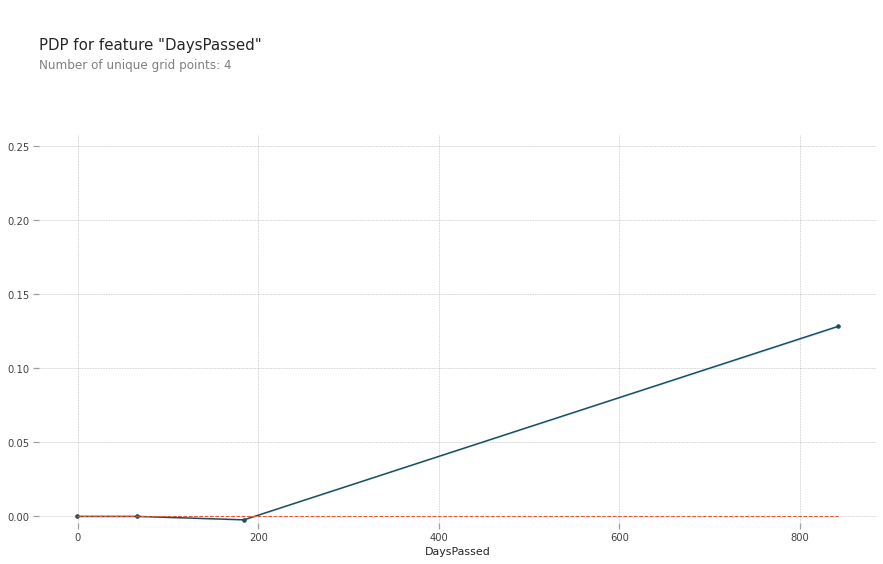

In [ ]:
# plot the PD univariate plot with Adaboost
plot_pdp(model, X_train, 'DaysPassed')

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex. For example, when applied to a linear regression model, partial dependence plots always show a linear relationship.

You selected NoOfContacts


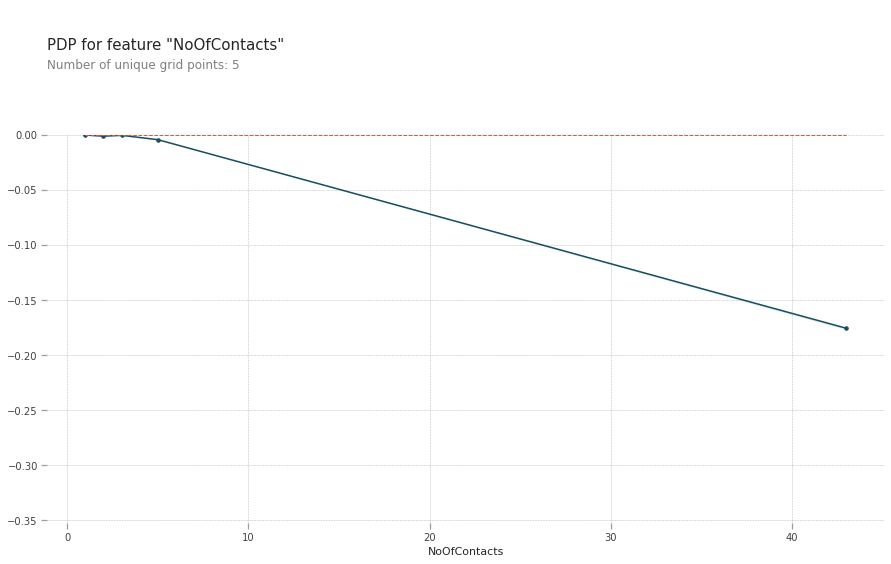

In [ ]:
#@title Select a predictor to analyse AdaBoost { run: "auto" }

selected_predictor = "NoOfContacts" #@param ['HHInsurance','CarLoan', 'Communication', 'NoOfContacts', 'DaysPassed','PrevAttempts','Outcome', 'CarInsurance']
print('You selected', selected_predictor)
plot_pdp(model, X_train, selected_predictor)

ICE Plots

ICE plot visualizes the dependence of the prediction on a feature for each instance (or clusters of instances) separately, resulting in one line per instance (or cluster), compared to one line overall in partial dependence plots.

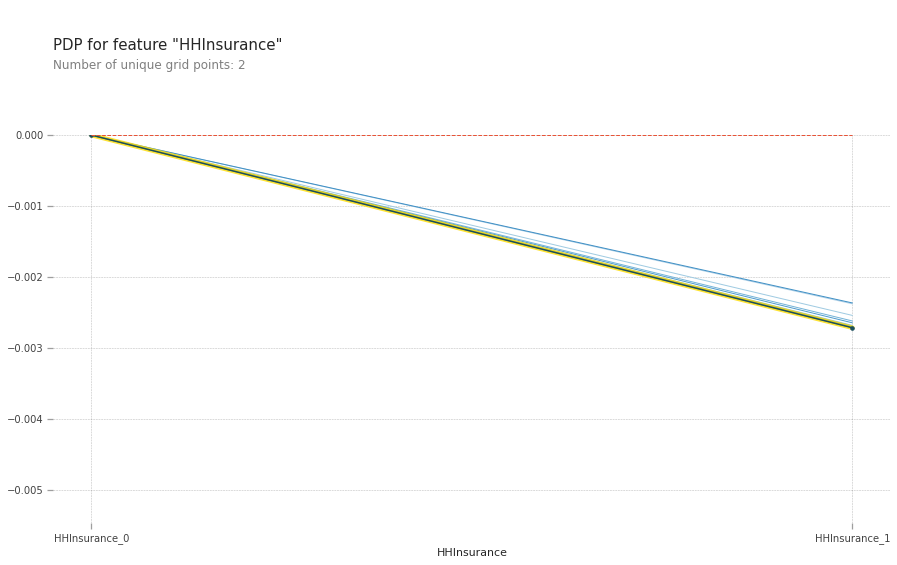

In [ ]:
# ICE Plot with AdaBoost
plot_pdp(model, X_train, 'HHInsurance', cluster_flag=True, nb_clusters=10, lines_flag=True)

You selected CarLoan with 49 clusters.


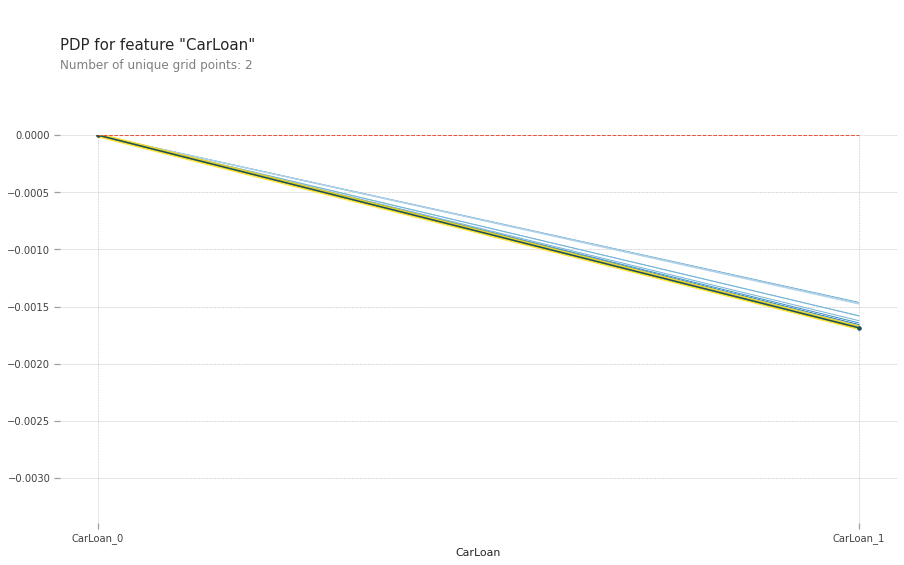

In [ ]:
#@title Select a predictor to analyse Adaboost. { run: "auto" }

selected_predictor = "CarLoan" #@param ['HHInsurance','CarLoan', 'Communication', 'NoOfContacts', 'DaysPassed','PrevAttempts','Outcome']
number_clusters = 49 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

### SHAP Explainer

In [ ]:
# import shap library
import shap

Create a shap explainer from gradient boosting model

In [ ]:
explainer = shap.TreeExplainer(model_2)
shap_values = explainer.shap_values(X_train)

Explain individual train (or test) data points on their contribution to the outcome.  
The below visualization shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue

In [ ]:
record_id = 18

print('Actual values:')
print(X_train.iloc[record_id,:])

# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[record_id,:], X_train.iloc[record_id,:])

Actual values:
HHInsurance        0
CarLoan            0
Communication      1
NoOfContacts       1
DaysPassed       433
PrevAttempts       1
Outcome            3
Name: 1115, dtype: int64


If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

In [ ]:
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.

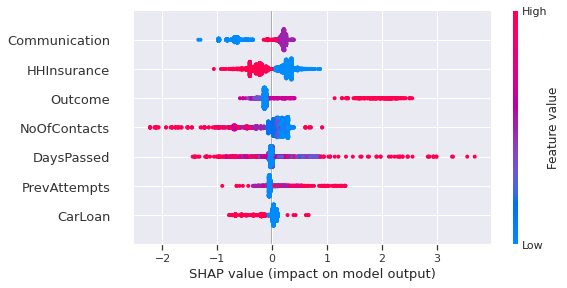

In [ ]:
# summarize the effects of all the features
shap.initjs()
shap.summary_plot(shap_values, X_train)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs).

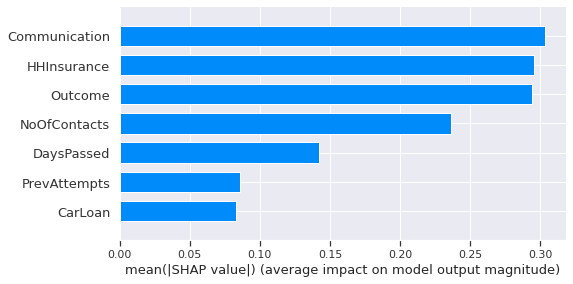

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")